# **Project 1 - House Price Prediction**
## **Contents**
* [Introduction](#Introduction)
  * [Context](#Context)
  * [Python Libraries](#Python-Libraries)
  * [Data Source](#Data-Source)
* [Exploratory Data Analysis](#Exploratory-Data-Analysis)
  * [Data Importation](#Data-Importation)
  * [Data Conversion](#Data-Conversion)
  * [Data Cleaning](#Data-Cleaning)
  * [Numerical Variable Exploration](#Numerical-Variable-Exploration)
  * [Categorical Variable Exploration](#Categorical-Variable-Exploration)
  * [Summary](#Summary)
* [Feature Engineering](#Feature-Engineering)
* [Data Preprocessing](#Data-Preprocessing)
* [Machine Learning Model Development](#Machine-Learning-Model-Development)
* [Machine Learning Model Evaluation](#Machine-Learning-Model-Evaluation)
* [Conclusion](#Conclusion)

## **Introduction**
### **Context**
The purpose of this project is to build a machine learning regression model in order to accurately predict house prices from given a dataset. This shall be done using a set of carefully chosen features from the dataset, and several machine learning regression models are then fine-tuned using grid-search cross-validation. A voting regressor shall then be used to incorporate the chosen models, so as to improve accuracy and reduce error.

### **Python Libraries**
**(TO BE COMPLETED!)**

In [66]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wrn
from sklearn.preprocessing import StandardScaler, LabelEncoder, PolynomialFeatures
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import r2_score, max_error, coverage_error, d2_absolute_error_score, mean_squared_error, mean_absolute_error, median_absolute_error, mean_squared_log_error, mean_absolute_percentage_error
from sklearn.exceptions import FitFailedWarning

# Set a random seed value for code reproducibility
np.random.seed(42)

# Set a plot style for aesthetics
palette = sns.color_palette("viridis_r", as_cmap = True)
sns.set_style(style = "whitegrid", rc = {"font.family":"Times New Roman", "font.weight":"bold"})

# Suppress unimportant warinings
wrn.filterwarnings(category = FutureWarning, action = "ignore")
wrn.filterwarnings(category = UserWarning, action = "ignore")
wrn.filterwarnings(category = FitFailedWarning, action = "ignore")

### **Data Source**
The dataset is found in the `housing-prices.csv` file, which itself has been downloaded from [Kaggle](https://www.kaggle.com/datasets/yasserh/housing-prices-dataset?resource=download) and subsequently renamed from `Housing.csv`.

## **Exploratory Data Analysis**
### **Data Importation**
The Python code used to import the dataset is given in the code cell below.

In [67]:
# Import the dataset
df = pd.read_csv("housing-prices.csv")

# Display the first few rows of the dataset
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


### **Data Conversion**
The dataset shall have its variables converted to the right data types. The Python code used to accomplish this is given in the code cell below.

In [68]:
# Display the dataset's datatypes
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

For the timebeing, all of the variables are of the right data type. Next, the dataset will be checked for missing values and other inconsistencies.

### **Data Cleaning**
The Python code used to clean the dataset is given in the code cell below.

In [69]:
# Check the dataset for missing values
df.isna().sum().sum()

0

Thankfully, the dataset has no missing values. Next, the dataset will be checked for any alarming outliers in its numerical variables.

In [70]:
numerical_variables = ["price", "area", "bedrooms", "bathrooms", "stories", "parking"]
df_numerical_variables = df[numerical_variables]
df_numerical_variables.describe().applymap(lambda x : f"{x:,.2f}")

,price,area,bedrooms,bathrooms,stories,parking
count,545.00,545.00,545.00,545.00,545.00,545.00
mean,"4,766,729.25","5,150.54",2.97,1.29,1.81,0.69
std,"1,870,439.62","2,170.14",0.74,0.50,0.87,0.86
min,"1,750,000.00","1,650.00",1.00,1.00,1.00,0.00
25%,"3,430,000.00","3,600.00",2.00,1.00,1.00,0.00
50%,"4,340,000.00","4,600.00",3.00,1.00,2.00,0.00
75%,"5,740,000.00","6,360.00",3.00,2.00,2.00,1.00
max,"13,300,000.00","16,200.00",6.00,4.00,4.00,3.00


No alarming outliers or other inconsistencies seem to appear in the dataset's numerical variable. Next...

### **Numerical Variable Exploration**
The general distribution of the dataset's numerical variable is visualised. The Python code to achive this is given in the code cell below.

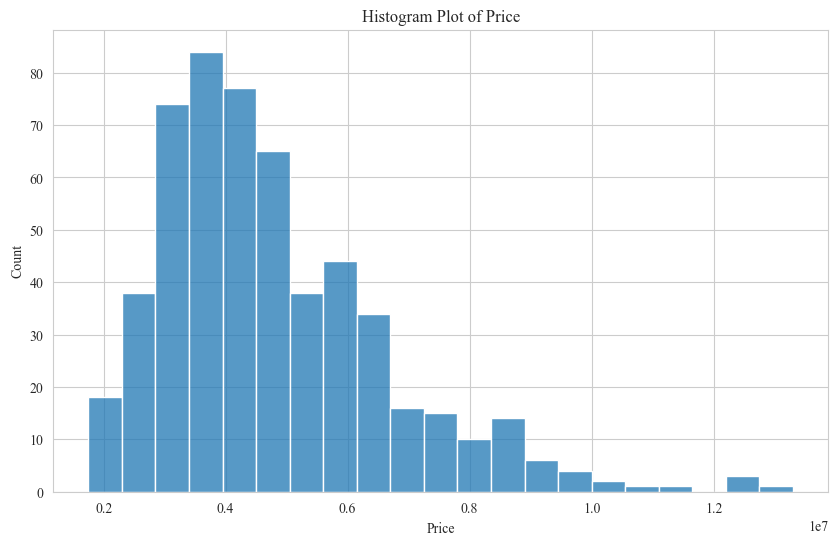

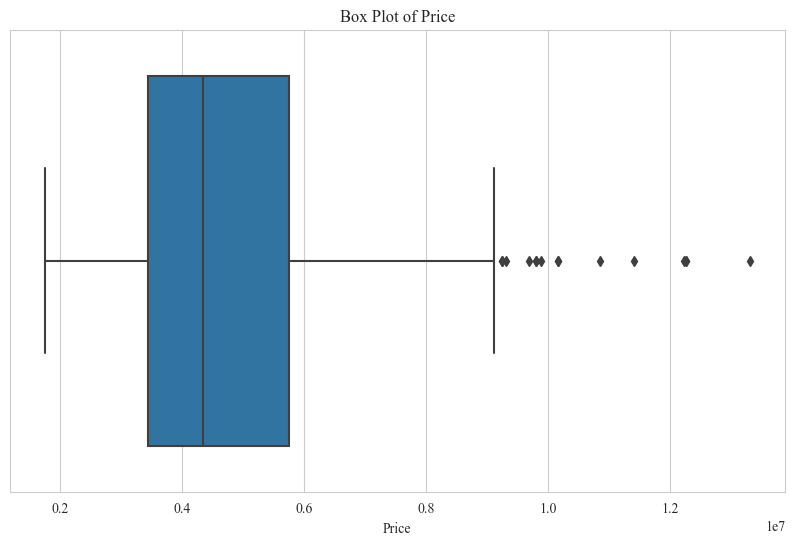

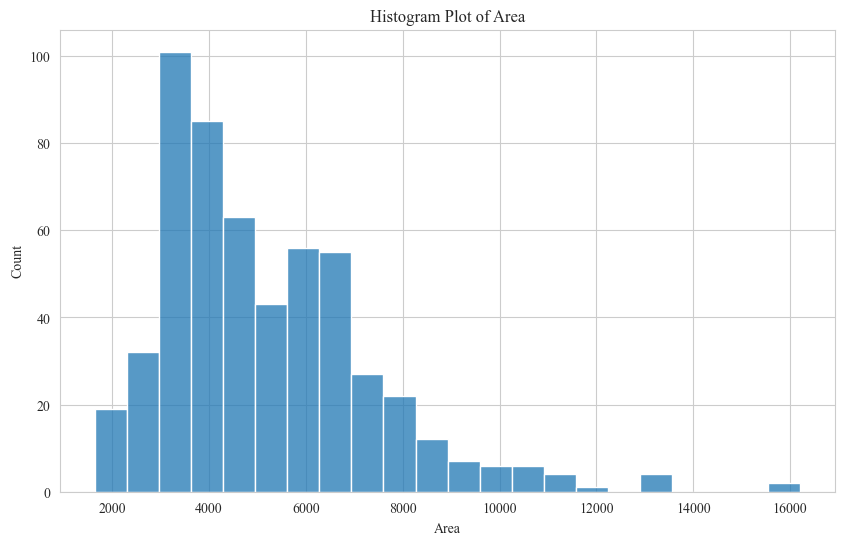

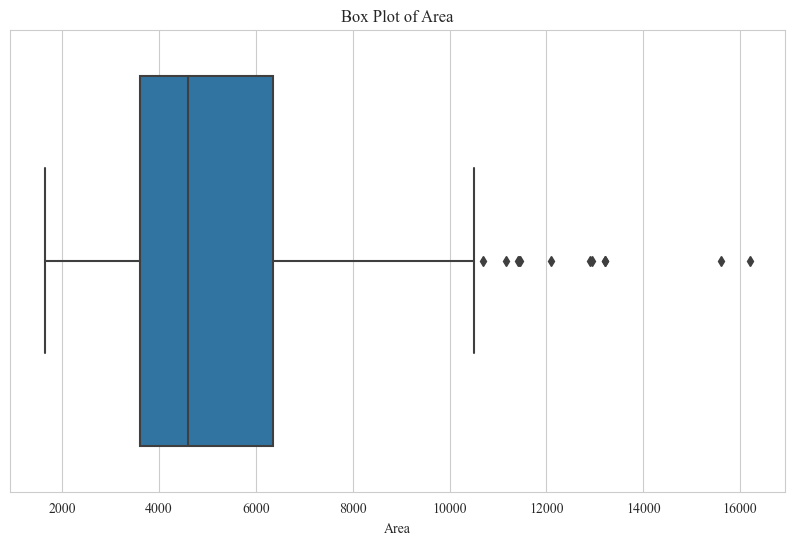

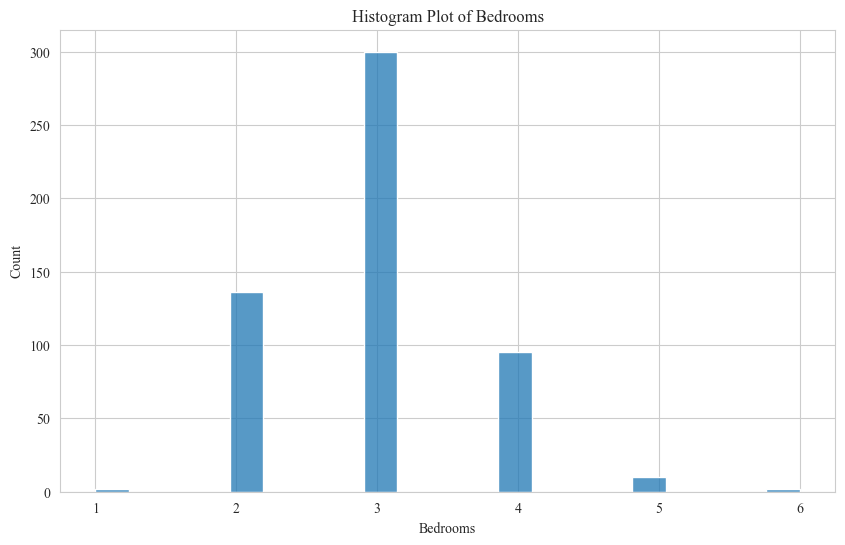

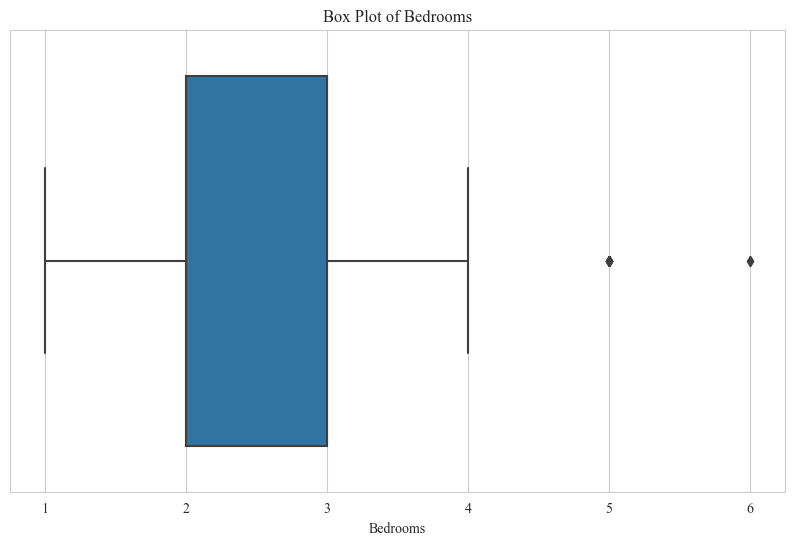

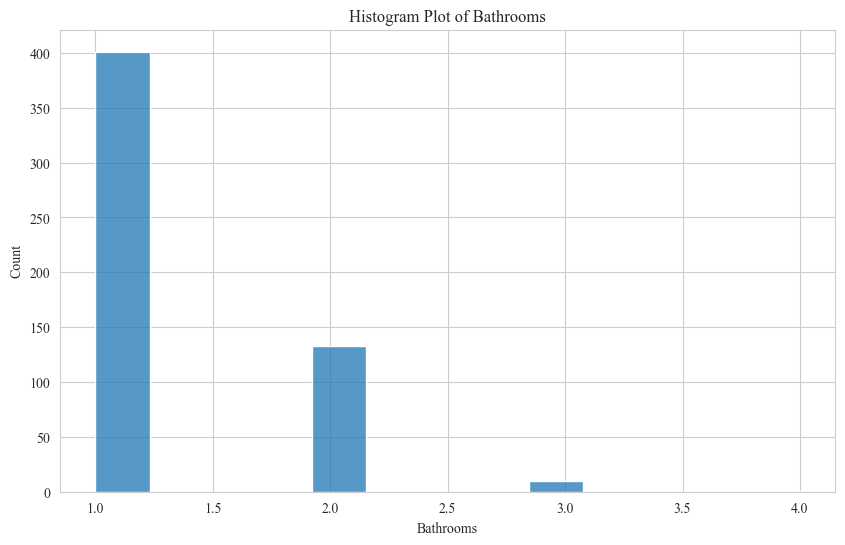

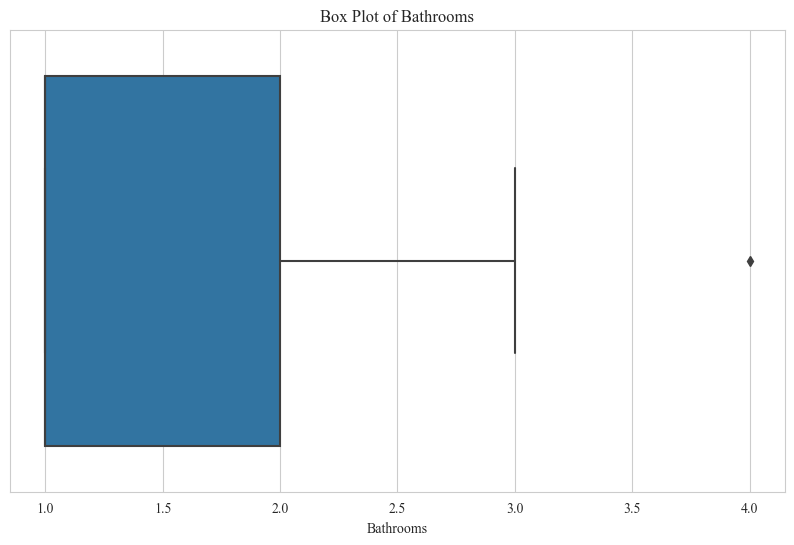

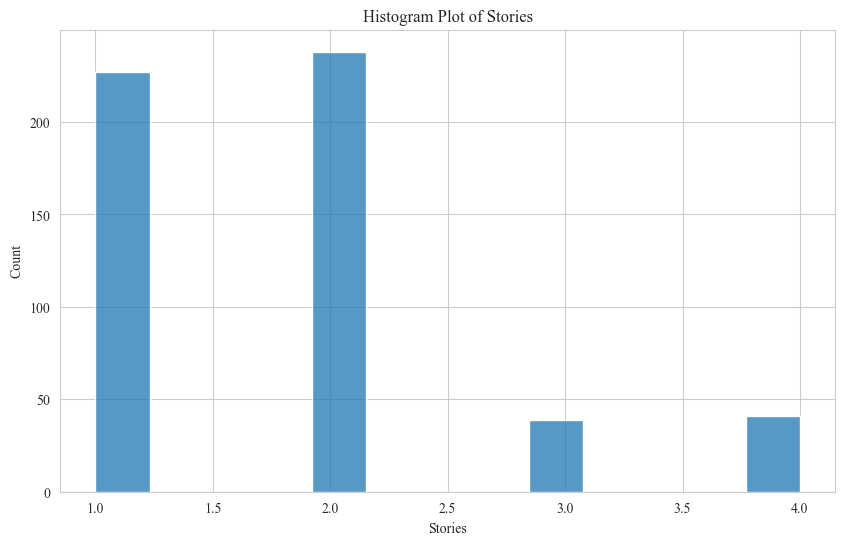

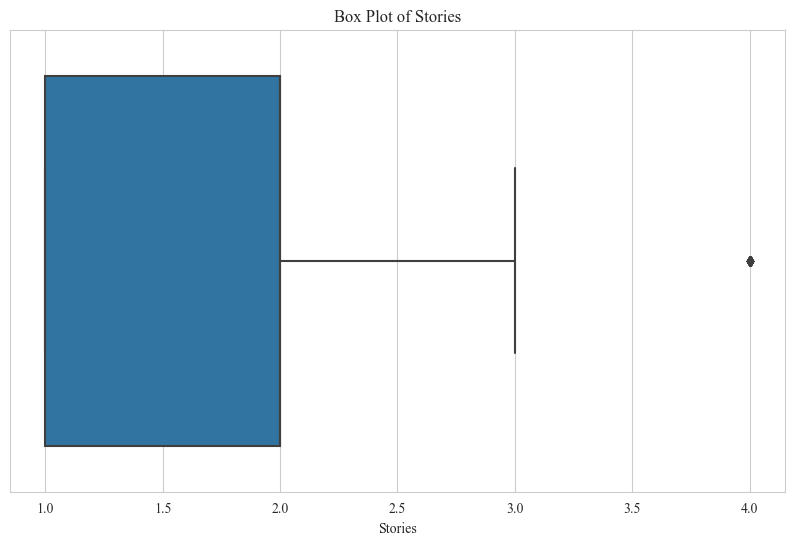

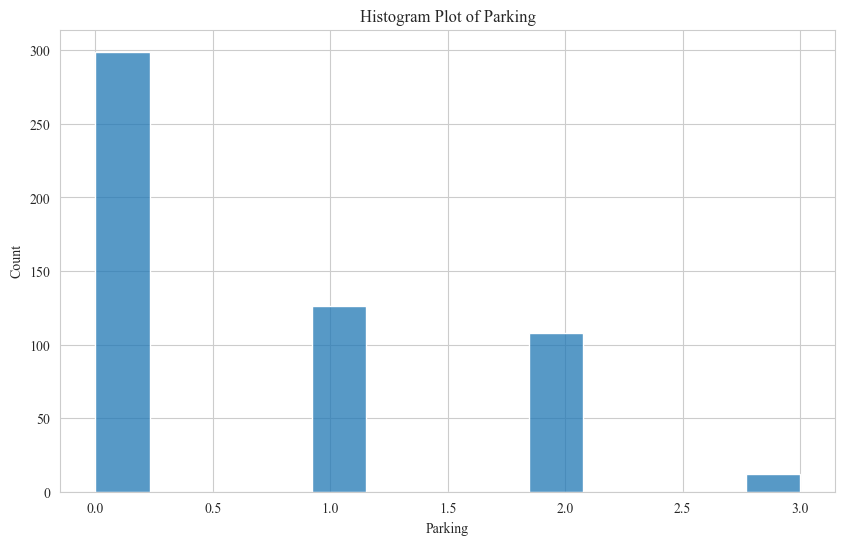

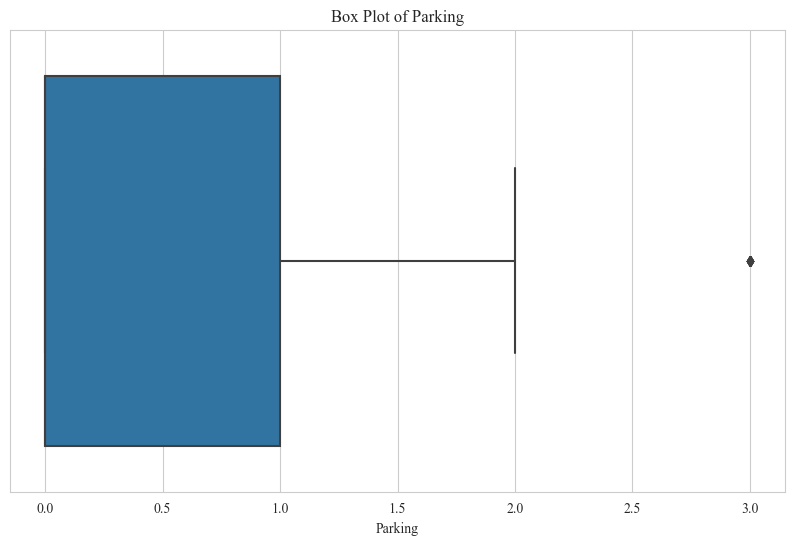

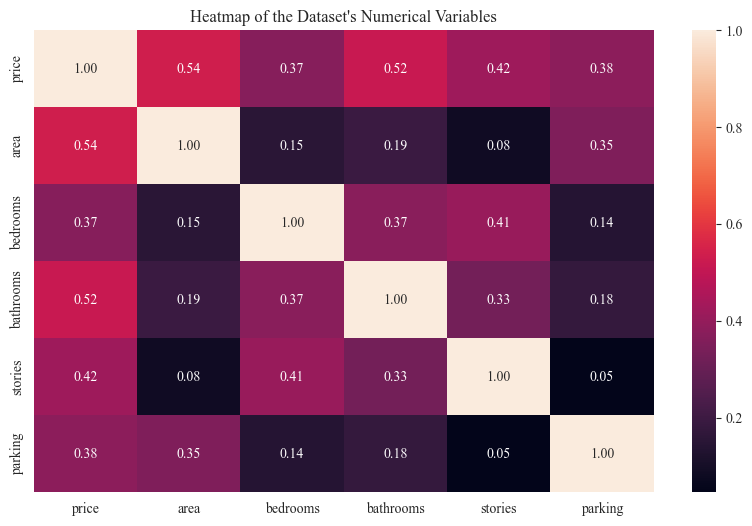

In [71]:
for numerical_variable in numerical_variables:
    label = numerical_variable.capitalize()
    fig, ax = plt.subplots(figsize = (10, 6), dpi = 100)
    sns.histplot(data = df, x = numerical_variable).set(xlabel = label, ylabel = "Count", title = f"Histogram Plot of {label}")
    plt.show()
    fig, ax = plt.subplots(figsize = (10, 6), dpi = 100)
    sns.boxplot(data = df, x = numerical_variable).set(xlabel = label, title = f"Box Plot of {label}")
    plt.show()

correlation_matrix = df_numerical_variables.corr()
fig, ax = plt.subplots(figsize = (10, 6), dpi = 100)
sns.heatmap(data = correlation_matrix, fmt=".2f", annot = True).set(title = "Heatmap of the Dataset's Numerical Variables")
plt.show()

From the above plots, especially the heatmap, it looks as though the `price` categorical variable has a stronger relationship with the `area`, `bathrooms` and `stories` variables than with the other variables. Thus, the three aforementioned numerical predictor variables will be retained, and the others removed.

### **Categorical Variable Exploration**
Next the general composition of the dataset's categorical variables shall be explored. The Python code to accomplish this is given in the code cell below.

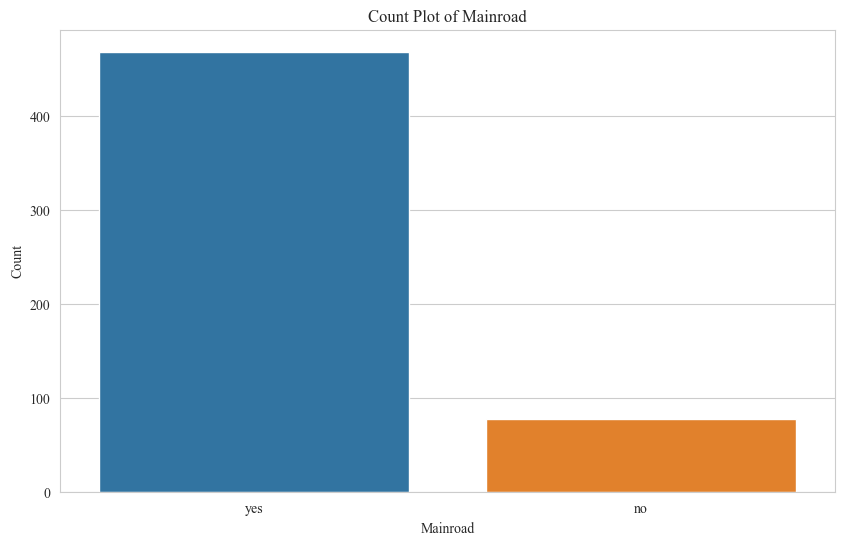

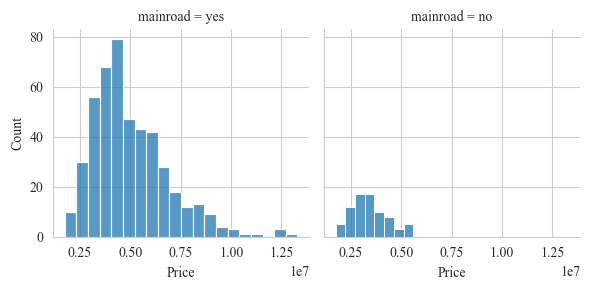

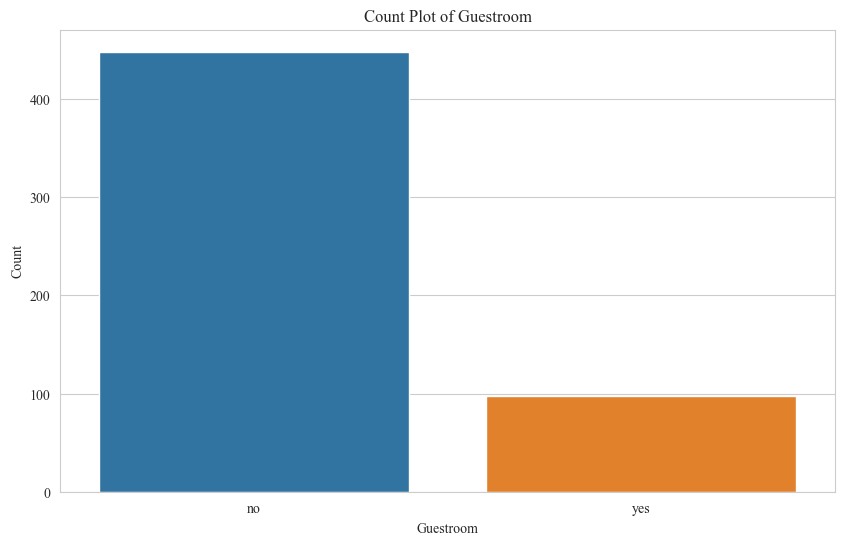

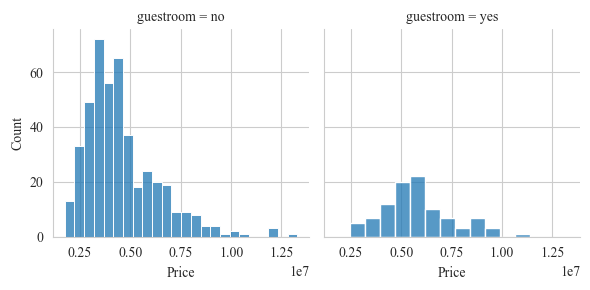

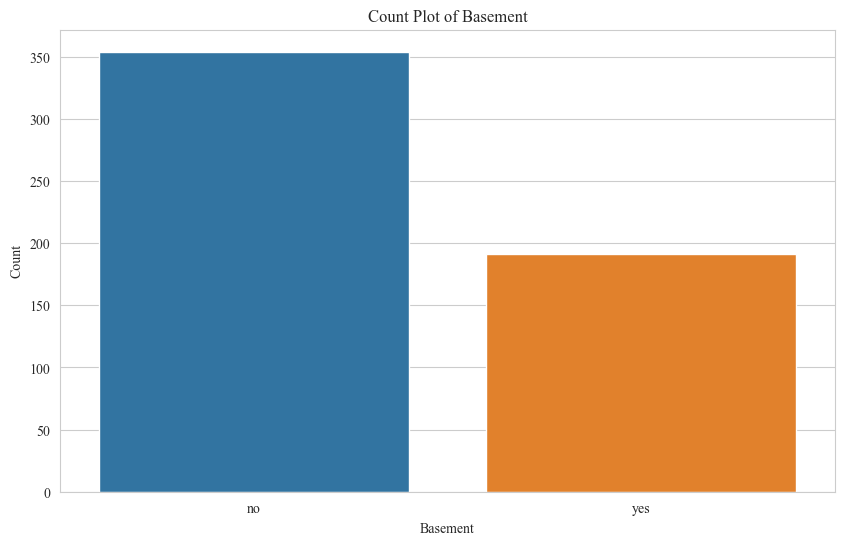

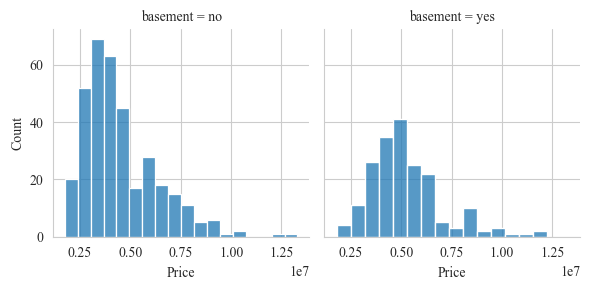

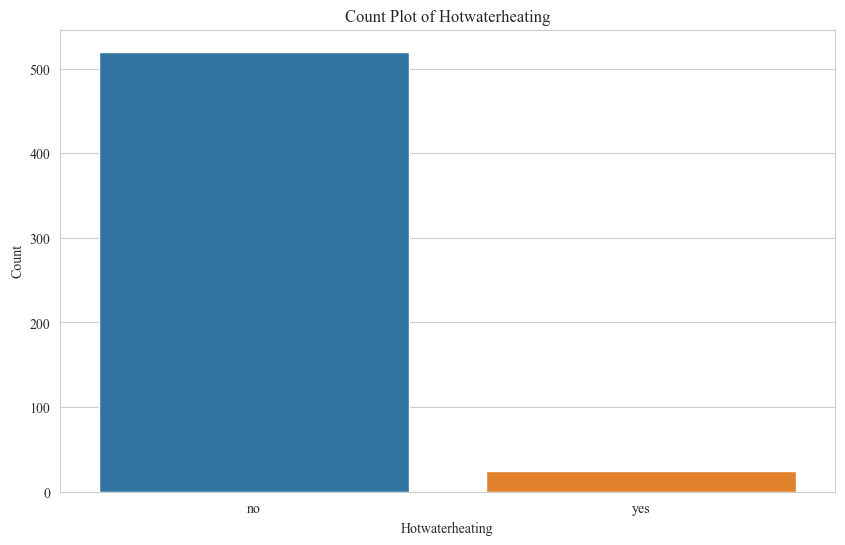

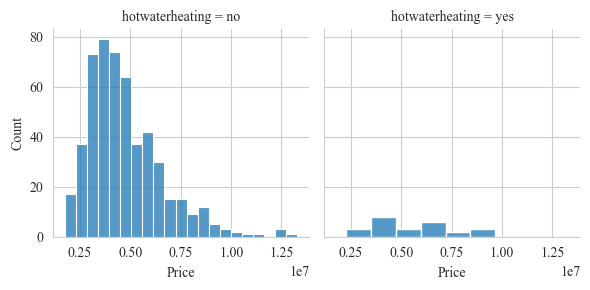

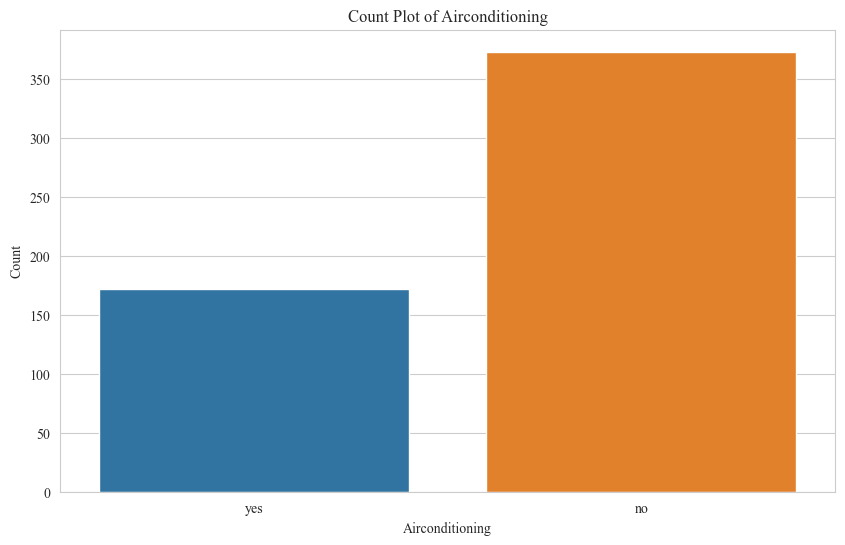

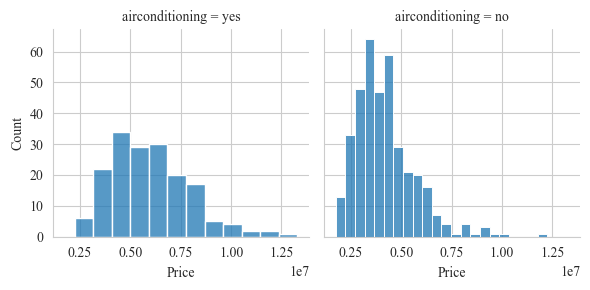

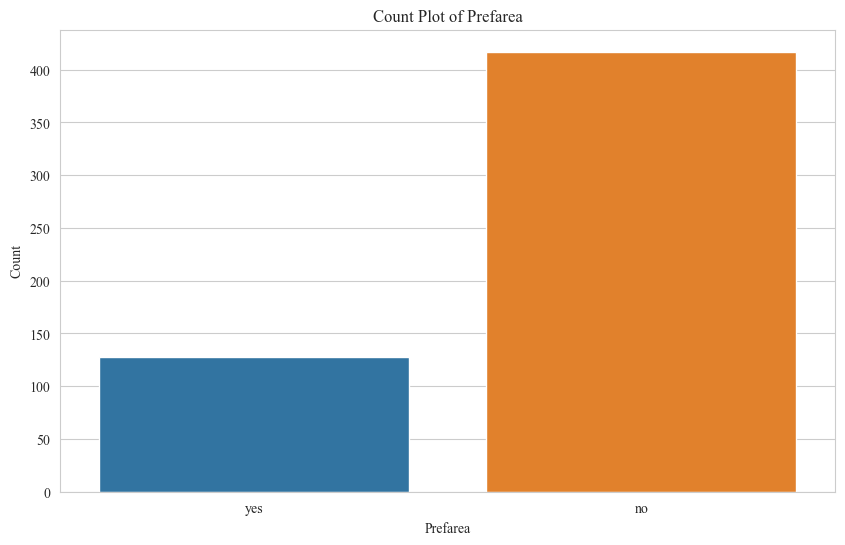

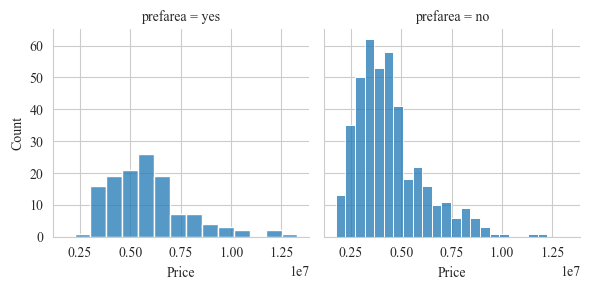

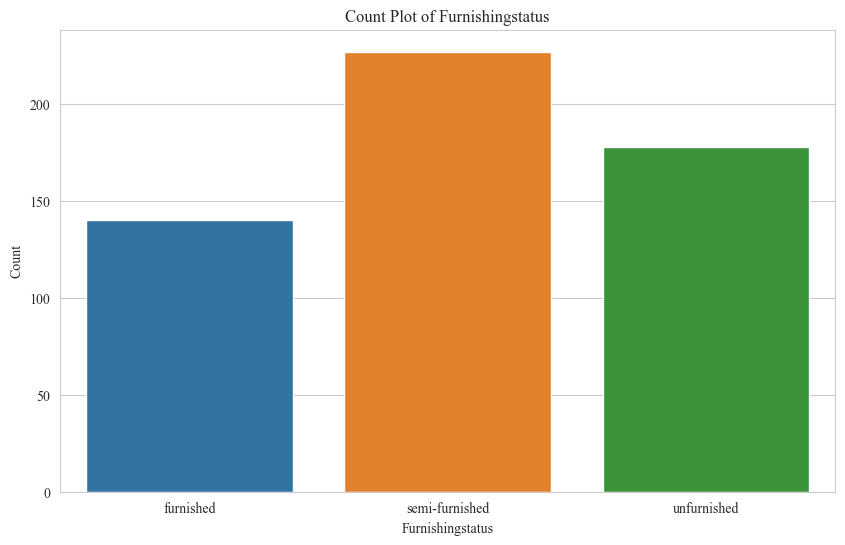

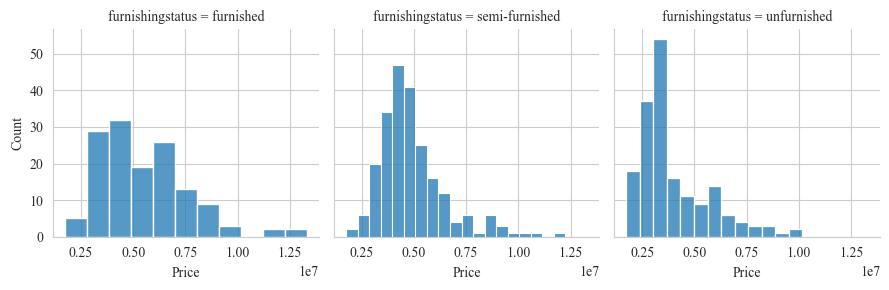

In [72]:
categorical_variables = ["mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", "prefarea", "furnishingstatus"]
df_categorical_variables = df[categorical_variables]
for x in categorical_variables:
    label = x.capitalize()
    fig, ax = plt.subplots(figsize = (10, 6), dpi = 100)
    sns.countplot(data = df, x = x).set(xlabel = label, ylabel = "Count", title = f"Count Plot of {label}")
    plt.show()
    price_grid = sns.FacetGrid(data = df, col = x)
    price_grid.map(sns.histplot, "price").set(xlabel = "Price", ylabel = "Count")
    plt.show()

From the above, it seems that the distribution of the `price` column of the dataset is highly dependent on some, but not all, of the categorical variables. Specifically, the `price` columns distribution seems vary mostly depending on the `mainroad`, `guestroom`, `basement` and `airconditioning` variables, and not the rest. Although those variables do suffer from class imbalance, there does not seem to be any Python library, to the author's knowledge, which deals with class imbalace in predictor categorical variables. For this reason, the following approach shall be taken instead: The four aforementioned categorical will be label-encoded so as to take into account all of their possible combinations within the dataset. This approach will better capture any patterns or relationships between those categorical variables and the `price` variable (the target variable). All other categorical variables will be removed.

### **Summary**
The following findings were made:
* The `price` variable of the dataset has stronger linear relationship with the `area`, `bathrooms` and `stories` variables than with the other variables. These three numerical variables shall be retained in the implementation of the predictive model.
* The `price` variable's distribution seems to vary most greatly when controlled for the `mainroad`, `guestroom`, `basement` and `airconditioning` variables. These categorical variables shall be retained in the implementation of the predictive model.

## **Feature Engineering**
No new features shall be created from the current variables. However, some features will be removed, as mentioned previously, because they are deemed weak predictors of the target variable. The Python code to accomplish this is given in the code cell below.

In [73]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


## **Data Preprocessing**
The retained features shall be preprocessed via the following steps:
* All numerical variables shall be transformed via standard scaling, and;
* All categorical variables shall be transformed via label encoding.

The Python code used to accomplish this is given in the code cell below.

In [74]:
# Reorder the dataset
df = df.iloc[:,[5,6,7,8,9,11,12,10,4,3,2,1,0]]

# Print the first few rows of the dataset
df.head()

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus,parking,stories,bathrooms,bedrooms,area,price
0,yes,no,no,no,yes,yes,furnished,2,3,2,4,7420,13300000
1,yes,no,no,no,yes,no,furnished,3,4,4,4,8960,12250000
2,yes,no,yes,no,no,yes,semi-furnished,2,2,2,3,9960,12250000
3,yes,no,yes,no,yes,yes,furnished,3,2,2,4,7500,12215000
4,yes,yes,yes,no,yes,no,furnished,2,2,1,4,7420,11410000


In [75]:
# Label-encode the categorical variables
categorical_variables = df.columns[:7]

# Display the first few rows of the dataset
for categorical_variable in categorical_variables:
    df[categorical_variable] = LabelEncoder().fit_transform(df[categorical_variable])

df.head()

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus,parking,stories,bathrooms,bedrooms,area,price
0,1,0,0,0,1,1,0,2,3,2,4,7420,13300000
1,1,0,0,0,1,0,0,3,4,4,4,8960,12250000
2,1,0,1,0,0,1,1,2,2,2,3,9960,12250000
3,1,0,1,0,1,1,0,3,2,2,4,7500,12215000
4,1,1,1,0,1,0,0,2,2,1,4,7420,11410000


In [76]:
price = df["price"]
mu = price.mean()
sigma = price.std()

def inverse_scaler(x):
    return sigma * x + mu

In [77]:
# Standard scale the numerical variables
numerical_variables = df.columns[7:]
for numerical_variable in numerical_variables:
    df[numerical_variable] = StandardScaler().fit_transform(df[numerical_variable].values.reshape(-1,1))

# Display the first few rows of the dataset
df.head()

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus,parking,stories,bathrooms,bedrooms,area,price
0,1,0,0,0,1,1,0,1.517692,1.378217,1.421812,1.403419,1.046726,4.566365
1,1,0,0,0,1,0,0,2.679409,2.532024,5.405809,1.403419,1.757010,4.004484
2,1,0,1,0,0,1,1,1.517692,0.224410,1.421812,0.047278,2.218232,4.004484
3,1,0,1,0,1,1,0,2.679409,0.224410,1.421812,1.403419,1.083624,3.985755
4,1,1,1,0,1,0,0,1.517692,0.224410,-0.570187,1.403419,1.046726,3.554979


In [78]:
# Define the feature matrix
X = df[df.columns[:-1]].values

# Define the target vector
y = df[df.columns[-1]].values

# Split the dataset into a training set and a testing set with a 80-20 distribution
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size=0.2)

## **Machine Learning Model Development**
The predictive model to develop shall be a simple voting regressor between four regression models:
- Linear Regression;
- Ridge Regression;
- Lasso Regression, and;
- Random Forest Regression.

Before being incorporated in the voting regressor, each model will be optimised using 5-fold grid-search cross-validation (for hyperparameter tuning). The Python code to accomplish this is given in the code cell below.

In [79]:
# Initialise the models and their hyperparameter grids
model_1 = LinearRegression()
hyperparameter_grid_1 = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'n_jobs': [-1, 1, 2]
}

model_2 = Ridge()
hyperparameter_grid_2 = {
    'alpha': [0.1, 0.5, 1, 5, 10],
    'fit_intercept': [True, False]
}

model_3 = Lasso()
hyperparameter_grid_3 = {
    'alpha': [0.1, 0.5, 1, 5, 10],
    'max_iter': [1000, 5000],
    'positive': [True, False]
}

model_4 = GradientBoostingRegressor()
hyperparameter_grid_4 = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5],
    'min_samples_split': [2, 5, 5],
    'min_samples_leaf': [1, 5, 7]
}

model_5 = RandomForestRegressor()
hyperparameter_grid_5 = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2']
}

models = [model_1, model_2, model_3, model_4, model_5]
hyperparameter_grids = [hyperparameter_grid_1, hyperparameter_grid_2, hyperparameter_grid_3, hyperparameter_grid_4, hyperparameter_grid_5]

# Perform grid search for hyperparameter tuning for each of the applicable models
for model, hyperparameter_grid in zip(models, hyperparameter_grids):
    grid_search = GridSearchCV(model, hyperparameter_grid, cv = 5, scoring = "neg_mean_squared_error")
    grid_search.fit(X_train, y_train)
    print(f"""Model: {model} \n Best Parameters: {grid_search.best_params_} \n Mean Squared Error: {-grid_search.best_score_}""")

Model: LinearRegression() 
 Best Parameters: {'copy_X': True, 'fit_intercept': True, 'n_jobs': -1} 
 Mean Squared Error: 0.30450314065110307
Model: Ridge() 
 Best Parameters: {'alpha': 5, 'fit_intercept': True} 
 Mean Squared Error: 0.3035258710794798
Model: Lasso() 
 Best Parameters: {'alpha': 0.1, 'max_iter': 1000, 'positive': False} 
 Mean Squared Error: 0.419580540667326
Model: GradientBoostingRegressor() 
 Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 50} 
 Mean Squared Error: 0.32269495546412247
Model: RandomForestRegressor() 
 Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50} 
 Mean Squared Error: 0.3036424945808102


The voting regressor is then implemented as follows.

In [82]:
# Initialise the models
model_1 = LinearRegression(copy_X = True, fit_intercept = True, n_jobs = -1)
model_2 = Ridge(alpha = 5, fit_intercept = True)
model_3 = Lasso(alpha = 0.1, max_iter = 1000, positive = False)
model_4 = GradientBoostingRegressor(learning_rate = 0.1, max_depth = 5, min_samples_leaf = 5, min_samples_split = 2, n_estimators = 50)
model_5 = RandomForestRegressor(max_depth = 10, max_features = 'log2', min_samples_leaf = 1, min_samples_split = 5, n_estimators = 100)
model = VotingRegressor(estimators = [("lr", model_1), ("r", model_2), ("l", model_3), ("gbr", model_4), ("rfr", model_5)], weights = [0.1,0.1,0.1,0.3,0.4])

# Fit the model in the training data
model.fit_transform(X_train, y_train)

array([[ 1.27061561,  1.26451501,  0.98944975,  1.32975829,  1.39499946],
       [ 1.10934222,  1.10021519,  0.77039518,  1.18303474,  1.2771579 ],
       [ 0.04489148,  0.0334743 , -0.2943828 , -0.45961028, -0.31959961],
       ...,
       [ 0.81165745,  0.74997549,  0.54053077,  0.563224  ,  0.31453137],
       [-1.02438828, -1.01692901, -0.62288496, -0.88708327, -0.86906756],
       [ 1.21968525,  1.21062079,  0.87250897,  1.02248209,  1.03249802]])

## **Machine Learning Model Evaluation**
The model is them evaluated using several scoring metrics.

In [84]:
-1 * cross_val_score(model, X_train, y_train, cv = 5, scoring = 'neg_mean_squared_error')

array([0.31806737, 0.24944761, 0.1477069 , 0.39590274, 0.36645748])

In [85]:
y_pred = model.predict(X_test)

In [86]:
metrics = [
    "R^2 Score:",
    "Mean Absolute Error:",
    "Mean Squared Error:",
    "Root Mean Squared Error:",
    "Mean Absolute Percentage Error:",
    "Median Absolute Error:"
]

scores = [
    r2_score(y_pred, y_test),
    mean_absolute_error(y_pred=y_pred, y_true=y_test),
    mean_squared_error(y_pred=y_pred, y_true=y_test),
    np.sqrt(mean_squared_error(y_pred=y_pred, y_true=y_test)),
    mean_absolute_percentage_error(y_pred=y_pred, y_true=y_test),
    median_absolute_error(y_pred=y_pred, y_true=y_test)
]

for metric, score in zip(metrics, scores):
    print(f"{metric} {score:,.5f}")

R^2 Score: 0.13993
Mean Absolute Error: 0.53116
Mean Squared Error: 0.52126
Root Mean Squared Error: 0.72198
Mean Absolute Percentage Error: 1.16631
Median Absolute Error: 0.40275


## **Conclusion**
**(TO BE COMPLETED!)**